<a href="https://colab.research.google.com/github/Janahmedtawfik/Janahmedtawfik/blob/main/calories_burnt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [46]:
calories = pd.read_csv('calories.csv')
exercise = pd.read_csv('exercise.csv')

In [47]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [48]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [49]:
# lazem tresti el index abl concat
exercise = exercise.reset_index(drop=True)
calories = calories.reset_index(drop=True)

In [50]:
xd = pd.concat([exercise, calories['Calories']], axis=1)

In [51]:
xd.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [52]:
xd.isna().sum()

,0
User_ID,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
Calories,0


In [53]:
for column in xd.select_dtypes(include ='number'):
  q1 = xd[column].quantile(0.25)
  q3 = xd[column].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  for index in xd[xd[column] < lower_bound].index:
    xd.at[index, column] = lower_bound
  for index in xd[xd[column] > upper_bound].index:
    xd.at[index, column] = upper_bound


In [54]:
xd.shape

(15000, 9)

In [55]:
xd.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465933,74.965400,15.530600,95.518367,40.033207,89.537267
std,2.872851e+06,16.980264,14.250563,15.030691,8.319203,9.582785,0.757570,62.449328
min,1.000116e+07,20.000000,132.500000,36.000000,1.000000,67.000000,38.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,216.500000,123.000000,30.000000,125.500000,41.500000,292.500000


In [56]:
xd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


<Axes: xlabel='Gender', ylabel='count'>

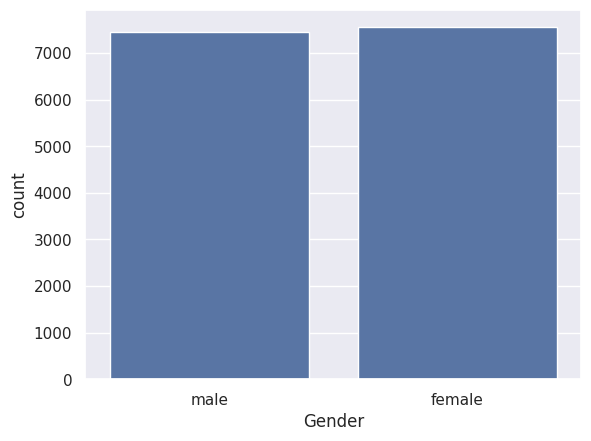

In [57]:
sns.countplot(x='Gender', data=xd)

<Axes: xlabel='Age', ylabel='Count'>

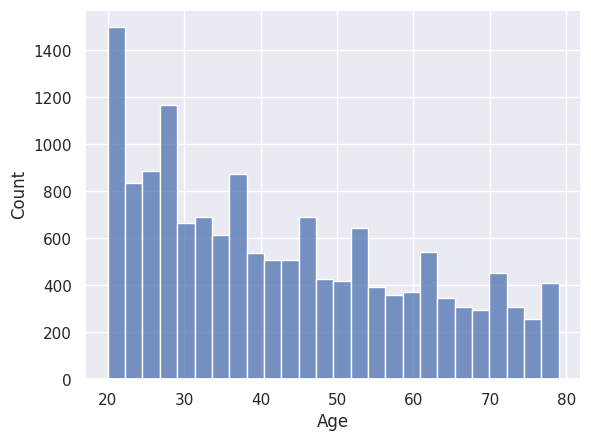

In [58]:
sns.histplot(xd['Age'])

<Axes: xlabel='Height', ylabel='Count'>

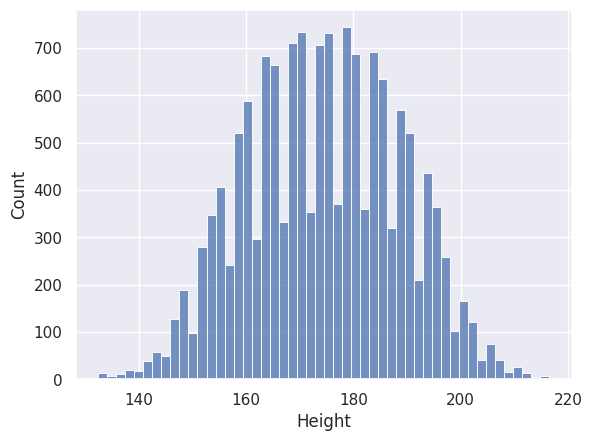

In [59]:
sns.histplot(xd['Height'])

<Axes: xlabel='Weight', ylabel='Count'>

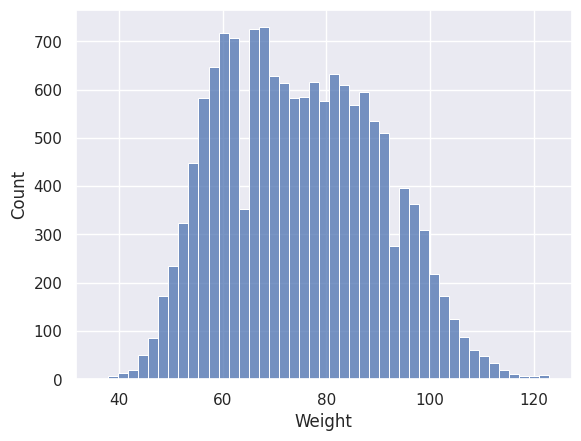

In [60]:
sns.histplot(xd['Weight'])

In [61]:
xd.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [62]:
xd.replace({'Gender':{'male':1,'female':0}}, inplace = True)

<ipython-input-62-a2e3af946251>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  xd.replace({'Gender':{'male':1,'female':0}}, inplace = True)


In [63]:
xd.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0


In [64]:
x = xd.drop(columns=['User_ID', 'Calories'])
y = xd['Calories']

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [66]:
model = XGBRegressor()
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [68]:
y_pred = model.predict(x_train)

In [69]:
mse = mean_squared_error(y_train, y_pred)
print("Mean Squared Error:", mse) #lower values better performance, mae less sensitive to outliers

Mean Squared Error: 1.6609025381688125


In [70]:
r2 = r2_score(y_train, y_pred)
print("R-squared:", r2) #the closer to 1 the better

R-squared: 0.9995702400859565


In [77]:
age = int(input('enter age: '))
gender = int(input('enter gender(1 male, 0 female): '))
height = int(input('enter height: '))
weight = float(input('enter weight: '))
duration = float(input('enter duration: '))
heart_rate = float(input('enter heart_rate: '))
body_temp = float(input('enter body_temp: '))
input_data = (age, gender, height, weight, duration, heart_rate, body_temp)
input_as_numpy_array = np.asarray(input_data)
input_reshaped = input_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_reshaped)
print(prediction)

enter age: 20
enter gender(1 male, 0 female): 1
enter height: 190
enter weight: 100
enter duration: 80
enter heart_rate: 140
enter body_temp: 40
[259.266]
